# First Shot

## 测试包完不完全

In [1]:
import jieba
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from collections import defaultdict

In [4]:
from collections import Counter

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from icecream import ic
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [7]:
import bz2
import random
import torch
from tqdm import tqdm
from icecream import ic

## Let's do it

In [8]:
content = pd.read_csv('dataset/train.csv')

In [9]:
len(content)

53360

In [10]:
content.head(20)

,id,label,label_desc,sentence
0,0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？
1,1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告
2,2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？
3,3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发
5,5,103,news_sports,再次证明了“无敌是多么寂寞”——逆天的中国乒乓球队！
6,6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台
7,7,116,news_game,重做or新英雄？其实重做对暴雪来说同样重要
8,8,103,news_sports,如何在商业活动中不受人欺骗？
9,9,101,news_culture,87版红楼梦最温柔的四个丫鬟，娶谁都是一生的福气


In [11]:
from collections import defaultdict
from collections import Counter

In [12]:
id_counter = Counter(content.label.values)

In [13]:
id_counter

Counter({108: 3437,
         104: 5200,
         106: 2107,
         112: 3368,
         109: 5955,
         103: 3991,
         116: 3390,
         101: 4081,
         107: 4118,
         100: 1111,
         102: 4976,
         110: 3632,
         115: 2886,
         113: 4851,
         114: 257})

In [14]:
len(id_counter)

15

## 测试id

In [15]:
a = 1
b = 1
print(id(a))
print(id(b))

3002514303280
3002514303280


## 字典的items()函数
以列表返回可遍历的(键, 值) 元组数组。

In [16]:
id_counter.items()

dict_items([(108, 3437), (104, 5200), (106, 2107), (112, 3368), (109, 5955), (103, 3991), (116, 3390), (101, 4081), (107, 4118), (100, 1111), (102, 4976), (110, 3632), (115, 2886), (113, 4851), (114, 257)])

In [17]:
for _id, value in id_counter.items():
    print(_id, value / len(content) * 100,'%')

108 6.441154422788606 %
104 9.745127436281859 %
106 3.948650674662669 %
112 6.31184407796102 %
109 11.160044977511244 %
103 7.479385307346327 %
116 6.353073463268366 %
101 7.648050974512744 %
107 7.717391304347826 %
100 2.0820839580209896 %
102 9.325337331334332 %
110 6.806596701649176 %
115 5.408545727136431 %
113 9.091079460269864 %
114 0.48163418290854576 %


In [18]:
content[content['label'] == 109].head(10)

,id,label,label_desc,sentence
4,4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发
6,6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台
10,10,109,news_tech,凌云研发的国产两轮电动车怎么样，有什么惊喜？
33,33,109,news_tech,小白如何做好自媒体的几个信念？
44,44,109,news_tech,听说最近联通搅乱了北京宽带市场价格，比小运营商的还低？
45,45,109,news_tech,我的焕驰前减震有异响，过凹凸不平的时候会咣当一声，是什么原因？
49,49,109,news_tech,哪种POS机适合养卡？
53,53,109,news_tech,为创业的你准备的（2018年新商机）
55,55,109,news_tech,阿里巴巴区块链专利排名全球第一，阿里都有哪些区块链应用？
62,62,109,news_tech,2018年教育科技技术新主题——AR+教育


## python apply函数的具体的含义：
 
apply(func [, args [, kwargs ]]) 函数用于当函数参数已经存在于一个元组或字典中时，间接地调用函数。args是一个包含将要提供给函数的按位置传递的参数的元组。如果省略了args，任 何参数都不会被传递，kwargs是一个包含关键字参数的字典。
 
apply()的返回值就是func()的返回值，apply()的元素参数是有序的，元素的顺序必须和func()形式参数的顺序一致


In [19]:
content['sentence_len'] = content['sentence'].apply(len)

查看content['sentence_len']

In [20]:
content['sentence_len']

0        44
1        46
2        32
3        19
4        21
         ..
53355    38
53356    16
53357    32
53358    30
53359    17
Name: sentence_len, Length: 53360, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [22]:
np.max(content['sentence_len'])

145

In [23]:
np.mean(content['sentence_len'])

22.13124062968516

In [24]:
np.std(content['sentence_len'])

7.30979185795089

In [25]:
math.ceil(22 + 7.3 * 1.5)

33

## np.where(condition, x, y)
满足条件(condition)，输出x，不满足输出y。
np.where(condition)
只有条件 (condition)，没有x和y，则输出满足条件 (即非0) 元素的坐标 (等价于numpy.nonzero)。这里的坐标以tuple的形式给出，通常原数组有多少维，输出的tuple中就包含几个数组，分别对应符合条件元素的各维坐标。

In [26]:
np.where(content['sentence_len'] < 22 + 7.3 * 1.5)

(array([    2,     3,     4, ..., 53357, 53358, 53359], dtype=int64),)

In [27]:
np.where(content['sentence_len'] < 22 + 7.3 * 1.5)[0]

array([    2,     3,     4, ..., 53357, 53358, 53359], dtype=int64)

In [28]:
len(np.where(content['sentence_len'] <= math.ceil(22 + 7.3 * 1.5))[0]) / len(content)

0.9617503748125937

(array([2.200e+01, 6.210e+02, 2.313e+03, 4.475e+03, 5.769e+03, 6.698e+03,
        6.917e+03, 4.824e+03, 7.290e+03, 9.416e+03, 2.974e+03, 9.350e+02,
        5.870e+02, 3.000e+02, 1.140e+02, 4.600e+01, 3.500e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,   4.86,   7.72,  10.58,  13.44,  16.3 ,  19.16,  22.02,
         24.88,  27.74,  30.6 ,  33.46,  36.32,  39.18,  42.04,  44.9 ,
         47.76,  50.62,  53.48,  56.34,  59.2 ,  62.06,  64.92,  67.78,
         70.64,  73.5 ,  76.36,  79.22,  82.08,  84.94,  87.8 ,  90.66,
         93.52,  96.38,  99.24, 102.1 , 104.96, 107.82, 110.68, 113.54,
        116.4 , 

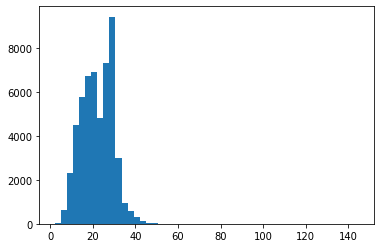

In [29]:
plt.hist(content['sentence_len'],bins=50)

## 我们为什么要关注这个长度呢？ 

### model -> x 向量化 
### 加速计划：[t1x, t2x, ... tNx] x向量的长度就一定得一样
### 极端情况：所有的长度就按照最短那个文章来
###  如何我们把所有的x向量的长度按照最长的长度来，会引发什么问题？

w *  x + b => 参数特别多 => 过拟合就会变严重！！！！

## jieba.cut函数

In [30]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)

print("Full Mode: " + "/ ".join(seg_list)) # 全模式

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\90392\AppData\Local\Temp\jieba.cache
Loading model cost 0.522 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [31]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)

print("Default Mode: " + "/ ".join(seg_list)) # 精确模式

Default Mode: 我/ 来到/ 北京/ 清华大学


## 默认是精确模式

In [32]:
import jieba
def cut(string):
    return list(jieba.cut(string))

In [33]:
lambda s:' '.join(cut(s))

<function __main__.<lambda>(s)>

##  join() 函数
方法用于将序列中的元素以指定的字符连接生成一个新的字符串。

join的例子

In [34]:
strg = "-"
seq = ("a", "b", "c")# 字符串序列
print(strg.join( seq ))

a-b-c


In [35]:
content['words'] = content['sentence'].apply(lambda s:' '.join(cut(s)))

查看 content['words']

In [36]:
content['words']

0        上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...
1        商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...
2        通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...
3                             2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？
4                          剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发
                               ...                        
53355    5 月 11 日中超 北京国安 2 - 2 富力 ， 国安 球迷 用 嘘声 对待 富力 外援...
53356                              云南 美食 故事 ： 蒙自 过桥米线 的 传说
53357    端州 ｜ 莫让 网事 随 “ 疯 ” ！ 检察官 老师 和 你 探讨 网 事 知多少 ~ 了...
53358        国产 最 霸气 的 东风 越野车 ， 150 万 还 买不到 ， 武装 全身 高大威猛 ！
53359                            极限 竞速 地平线 3 ， 原创 娱乐 游戏 视频
Name: words, Length: 53360, dtype: object

In [37]:
content['words_len']=content['words'].apply(lambda s: len(s.split()))

查看 content['words_len']

In [38]:
content['words_len']

0        26
1        20
2        21
3        10
4        11
         ..
53355    23
53356     8
53357    21
53358    16
53359     9
Name: words_len, Length: 53360, dtype: int64

In [39]:
words_len = content['words_len']

In [40]:
np.mean(words_len)

12.76617316341829

In [41]:
np.std(words_len)

4.53392084226197

In [42]:
np.max(words_len)

81

In [43]:
len(np.where(words_len <= 20)[0]) / len(content)

0.9625187406296851

(array([5.200e+01, 9.590e+02, 1.305e+03, 4.840e+03, 3.254e+03, 7.498e+03,
        8.194e+03, 3.936e+03, 7.620e+03, 3.794e+03, 6.459e+03, 3.449e+03,
        7.860e+02, 6.690e+02, 1.700e+02, 2.520e+02, 7.400e+01, 1.400e+01,
        2.500e+01, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. , 34.6,
        36.2, 37.8, 39.4, 41. , 42.6, 44.2, 45.8, 47.4, 49. , 50.6, 52.2,
        53.8, 55.4, 57. , 58.6, 60.2, 61.8, 63.4, 65. , 66.6, 68.2, 69.8,
        71.4, 73. , 74.6, 76.2, 77.8, 79.4, 81. ]),
 <BarContainer object of 50 

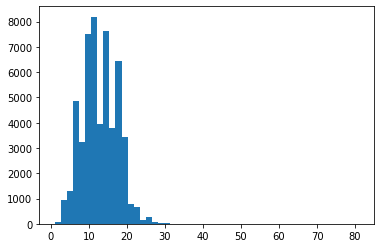

In [44]:
plt.hist(content['words_len'], bins=50)

In [45]:
content['words_keep'] = content['words'].apply(lambda s:' '.join(s.split()[:20]))

查看 content['words_keep']

In [46]:
content['words_keep']

0        上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...
1        商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...
2        通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...
3                             2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？
4                          剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发
                               ...                        
53355    5 月 11 日中超 北京国安 2 - 2 富力 ， 国安 球迷 用 嘘声 对待 富力 外援...
53356                              云南 美食 故事 ： 蒙自 过桥米线 的 传说
53357    端州 ｜ 莫让 网事 随 “ 疯 ” ！ 检察官 老师 和 你 探讨 网 事 知多少 ~ 了...
53358        国产 最 霸气 的 东风 越野车 ， 150 万 还 买不到 ， 武装 全身 高大威猛 ！
53359                            极限 竞速 地平线 3 ， 原创 娱乐 游戏 视频
Name: words_keep, Length: 53360, dtype: object

In [47]:
content.to_csv('train_after_analysis.csv')

In [48]:
from functools import reduce
sentences = content['words_keep'].tolist()

查看 sentences

In [49]:
sentences

['上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让 老师 赔 ，',
 '商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报告 的 事后 审核 问询 函 的 公告',
 '通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎么 处理',
 '2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？',
 '剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发',
 '再次 证明 了 “ 无敌 是 多么 寂寞 ” — — 逆天 的 中国乒乓球队 ！',
 '三农 盾 SACC - 全球 首个 推出 ： 互联网 + 区块 链 + 农产品 的 电商 平台',
 '重做 or 新 英雄 ？ 其实 重做 对 暴雪 来说 同样 重要',
 '如何 在 商业活动 中不受 人 欺骗 ？',
 '87 版 红楼梦 最 温柔 的 四个 丫鬟 ， 娶 谁 都 是 一生 的 福气',
 '凌云 研发 的 国产 两轮 电动车 怎么样 ， 有 什么 惊喜 ？',
 '房地产 税 迟迟 无法 出台 ？ 央行 研究 局局长 徐忠 这样 说',
 '我 四千 一个月 ， 老婆 一千五 一个月 ， 存款 八万 且 有 两 小孩 ， 是 先 买房 还是 先买',
 '“ 产地 办展 ” 模式 为 “ 东莞 制造 ” 送 创新 情报',
 '全国 首个 央地 融合 平台 在 沪 落地',
 '故事 ： 刘 主任 建 猪场',
 '什么 是 人情 ， 什么 是 世故 ？',
 '「 关注 」 网络 自 媒体 不是 “ 法外 之 地 ” ， 以谣 博名 、 以谣 博利 将 被',
 '古代 先进 文明 的 证据 ！ 这是 历史 上 最 著名 的 10 把 剑',
 '加快 产城 融合 以 科技 创新 引领 新城区 建设',
 '取名 困难 症 患者 皇马 的 贝尔 ， 第一个 受害者 就是 他 的 儿子',
 '夫妻间 能 不能 互看 手机 ？',
 '探秘 、 日本 关东 特大 地震 ！',
 '上联 ： 千峰 入眠 松涛 静 ， 怎么 接 下联 ？',
 '如何 阻止 基拉 韦厄 活火山 的 熔岩',
 '单硝酸 异 山梨 酯 片 与 硝酸 异 山梨 酯 片 有何 区别

## map函数
map()函数接收两个参数，一个是函数，一个是Iterable，map将传入的函数依次作用到序列的每一个元素，并把结果作为新的Iterable返回。其语法格式为：                map(function，iterable...)

In [50]:
def square(x) :            # 计算平方数
    return x ** 2

list(map(square, [1,2,3,4,5]))

[1, 4, 9, 16, 25]

In [51]:
list(map(lambda x: x ** 2, [1, 2, 3, 4, 5]) )

[1, 4, 9, 16, 25]

In [52]:
sentences = list(map(lambda s: s.split(), sentences))

查看 list后的sentences

In [53]:
sentences 

[['上课时',
  '学生',
  '手机',
  '响个',
  '不停',
  '，',
  '老师',
  '一怒之下',
  '把',
  '手机',
  '摔',
  '了',
  '，',
  '家长',
  '拿',
  '发票',
  '让',
  '老师',
  '赔',
  '，'],
 ['商赢',
  '环球',
  '股份',
  '有限公司',
  '关于',
  '延期',
  '回复',
  '上海证券交易所',
  '对',
  '公司',
  '2017',
  '年',
  '年度报告',
  '的',
  '事后',
  '审核',
  '问询',
  '函',
  '的',
  '公告'],
 ['通过',
  '中介',
  '公司',
  '买',
  '了',
  '二手房',
  '，',
  '首付',
  '都',
  '付',
  '了',
  '，',
  '现在',
  '卖家',
  '不想',
  '卖',
  '了',
  '。',
  '怎么',
  '处理'],
 ['2018', '年', '去', '俄罗斯', '看', '世界杯', '得花', '多少', '钱', '？'],
 ['剃须刀', '的', '个性', '革新', '，', '雷明登', '天猫', '定制', '版', '新品', '首发'],
 ['再次',
  '证明',
  '了',
  '“',
  '无敌',
  '是',
  '多么',
  '寂寞',
  '”',
  '—',
  '—',
  '逆天',
  '的',
  '中国乒乓球队',
  '！'],
 ['三农',
  '盾',
  'SACC',
  '-',
  '全球',
  '首个',
  '推出',
  '：',
  '互联网',
  '+',
  '区块',
  '链',
  '+',
  '农产品',
  '的',
  '电商',
  '平台'],
 ['重做', 'or', '新', '英雄', '？', '其实', '重做', '对', '暴雪', '来说', '同样', '重要'],
 ['如何', '在', '商业活动', '中不受', '人', '欺骗', '？'],
 ['87',
  '版',
  '红楼梦',
  '最

## reduce
reduce() 函数会对参数序列中元素进行累
reduce(function, iterable[, initializer])

In [54]:
sum1 = reduce(lambda x, y: x+y, [1,2,3,4,5])
print(sum1)

15


In [55]:
all_words = reduce(lambda a, b: a + b, sentences)

查看all_words

In [56]:
all_words

['上课时',
 '学生',
 '手机',
 '响个',
 '不停',
 '，',
 '老师',
 '一怒之下',
 '把',
 '手机',
 '摔',
 '了',
 '，',
 '家长',
 '拿',
 '发票',
 '让',
 '老师',
 '赔',
 '，',
 '商赢',
 '环球',
 '股份',
 '有限公司',
 '关于',
 '延期',
 '回复',
 '上海证券交易所',
 '对',
 '公司',
 '2017',
 '年',
 '年度报告',
 '的',
 '事后',
 '审核',
 '问询',
 '函',
 '的',
 '公告',
 '通过',
 '中介',
 '公司',
 '买',
 '了',
 '二手房',
 '，',
 '首付',
 '都',
 '付',
 '了',
 '，',
 '现在',
 '卖家',
 '不想',
 '卖',
 '了',
 '。',
 '怎么',
 '处理',
 '2018',
 '年',
 '去',
 '俄罗斯',
 '看',
 '世界杯',
 '得花',
 '多少',
 '钱',
 '？',
 '剃须刀',
 '的',
 '个性',
 '革新',
 '，',
 '雷明登',
 '天猫',
 '定制',
 '版',
 '新品',
 '首发',
 '再次',
 '证明',
 '了',
 '“',
 '无敌',
 '是',
 '多么',
 '寂寞',
 '”',
 '—',
 '—',
 '逆天',
 '的',
 '中国乒乓球队',
 '！',
 '三农',
 '盾',
 'SACC',
 '-',
 '全球',
 '首个',
 '推出',
 '：',
 '互联网',
 '+',
 '区块',
 '链',
 '+',
 '农产品',
 '的',
 '电商',
 '平台',
 '重做',
 'or',
 '新',
 '英雄',
 '？',
 '其实',
 '重做',
 '对',
 '暴雪',
 '来说',
 '同样',
 '重要',
 '如何',
 '在',
 '商业活动',
 '中不受',
 '人',
 '欺骗',
 '？',
 '87',
 '版',
 '红楼梦',
 '最',
 '温柔',
 '的',
 '四个',
 '丫鬟',
 '，',
 '娶',
 '谁',
 '都',
 '是',
 '一生',
 '的',


In [57]:
words_count = Counter(all_words)

查看 words_count

In [58]:
words_count

Counter({'上课时': 61,
         '学生': 296,
         '手机': 844,
         '响个': 61,
         '不停': 77,
         '，': 34665,
         '老师': 274,
         '一怒之下': 63,
         '把': 686,
         '摔': 74,
         '了': 6694,
         '家长': 189,
         '拿': 260,
         '发票': 72,
         '让': 1180,
         '赔': 78,
         '商赢': 1,
         '环球': 17,
         '股份': 122,
         '有限公司': 74,
         '关于': 156,
         '延期': 9,
         '回复': 27,
         '上海证券交易所': 1,
         '对': 1757,
         '公司': 466,
         '2017': 193,
         '年': 1601,
         '年度报告': 2,
         '的': 21634,
         '事后': 7,
         '审核': 5,
         '问询': 3,
         '函': 4,
         '公告': 81,
         '通过': 101,
         '中介': 25,
         '买': 731,
         '二手房': 38,
         '首付': 37,
         '都': 2481,
         '付': 17,
         '现在': 789,
         '卖家': 11,
         '不想': 77,
         '卖': 264,
         '。': 245,
         '怎么': 2175,
         '处理': 60,
         '2018': 972,
         '去': 988,
    

In [59]:
sorted(words_count.items(),key=lambda kv:kv[1],reverse=True)

[('，', 34665),
 ('？', 23205),
 ('的', 21634),
 ('！', 9332),
 ('：', 7684),
 ('了', 6694),
 ('是', 5824),
 ('“', 5551),
 ('”', 5471),
 ('你', 4839),
 ('有', 4042),
 ('在', 3987),
 ('吗', 3686),
 ('什么', 3059),
 ('中国', 2930),
 ('为什么', 2790),
 ('如何', 2679),
 ('都', 2481),
 ('和', 2447),
 ('人', 2260),
 ('怎么', 2175),
 ('《', 2137),
 ('被', 2130),
 ('不', 2127),
 ('》', 2125),
 ('、', 1840),
 ('会', 1769),
 ('对', 1757),
 ('我', 1755),
 ('美国', 1698),
 ('年', 1601),
 ('上', 1477),
 ('—', 1457),
 ('看', 1441),
 ('最', 1440),
 ('能', 1415),
 ('这', 1399),
 ('一个', 1291),
 ('要', 1272),
 ('好', 1271),
 ('还', 1267),
 ('就', 1256),
 ('将', 1255),
 ('后', 1251),
 ('与', 1234),
 ('大', 1232),
 ('中', 1184),
 ('让', 1180),
 ('哪些', 1173),
 ('5', 1064),
 ('他', 1060),
 ('世界', 1005),
 ('却', 996),
 ('去', 988),
 ('新', 981),
 ('到', 981),
 ('月', 980),
 ('2018', 972),
 ('谁', 969),
 ('可以', 928),
 ('多', 926),
 ('说', 924),
 ('也', 913),
 ('又', 906),
 ('上联', 885),
 ('个', 871),
 ('来', 863),
 ('网友', 852),
 ('如果', 847),
 ('手机', 844),
 ('下联', 838),
 ('

In [60]:
stop_words = [w for w, _ in sorted(words_count.items(),key=lambda kv:kv[1],reverse=True)[:300]]

看看循环里干了什么

In [61]:
for w,_ in sorted(words_count.items(),key=lambda kv:kv[1],reverse=True)[:300]:
    print(w)

，
？
的
！
：
了
是
“
”
你
有
在
吗
什么
中国
为什么
如何
都
和
人
怎么
《
被
不
》
、
会
对
我
美国
年
上
—
看
最
能
这
一个
要
好
还
就
将
后
与
大
中
让
哪些
5
他
世界
却
去
新
到
月
2018
谁
可以
多
说
也
又
上联
个
来
网友
如果
手机
下联
日本
做
用
没有
还是
万
现在
为
农村
为何
买
…
「
」
给
这个
3
把
岁
-
怎样
呢
多少
一
｜
10
（
很
）
国家
到底
哪个
知道
更
她
俄罗斯
4
真的
想
日
游戏
我们
小
过
下
自己
里
这些
2
怎么样
钱
从
城市
未来
这么
1
亿
王者
成为
公司
没
汽车
孩子
发展
吃
打
车
8
看待
荣耀
伊朗
再
活动
该
6
以色列
比
高
旅游
着
这样
出
才
第一
时
那么
不是
全球
前
美
市场
之
企业
英雄
20
生活
或
还有
投资
只
特朗普
·
就是
小米
不能
哪
需要
而
印度
技术
评价
7
等
选择
+
科技
链
教育
已
他们
它
可能
喜欢
北京
当
区块
国际
上市
马云
联想
但
玩
成
吧
房子
学生
行业
创业
哪里
元
协议
开
品牌
走
9
怎么办
房价
地方
影响
带
得
最后
不会
们
原因
成功
最大
太
即将
是否
价格
老师
腾讯
经济
可
应该
卖
看看
比较
叙利亚
时候
银行
大家
拿
十年
问题
故事
值得
微信
时代
全国
历史
项目
开始
工作
华为
已经
上海
文化
老
你们
万元
推荐
。
买房
联盟
普京
很多
求生
绝地
退出
韩国
升级
跑
火箭
苹果
发布
只有
号
向
出现
厉害
今年
比赛
什么样
国内
平台
跟
30
最好
分
12
快
币
体验
汶川
家
适合
出席


In [62]:
with open('dataset/stopwords.txt', 'w') as f:
    for w in stop_words:
        f.write(w + '\n')

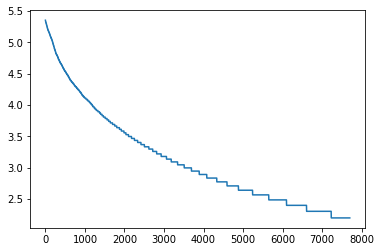

In [63]:
plt.plot(list(map(lambda n:np.log(n),sorted(words_count.values(),reverse=True)[300:8000])))